# Project -  Selecting Content for Data Science Company

In this project, we will try to answer the question: "What do people want to learn in data science", and in so doing evaluate the available content for our company which deals with data science education. 

**Scenario**

We're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms. We're tasked with figuring out what is best content to write about. We realize that if we wanted to figure out what programming content to write, we could consult [Stack Overflow](https://stackoverflow.com/) (a question and answer website about programming) and see what kind of content is more popular. After investigating Stack Overflow in depth, we find out that it is part of a question and answer website network called [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange).

### Stack Exchange

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! Here's a sample of the most popular sites:

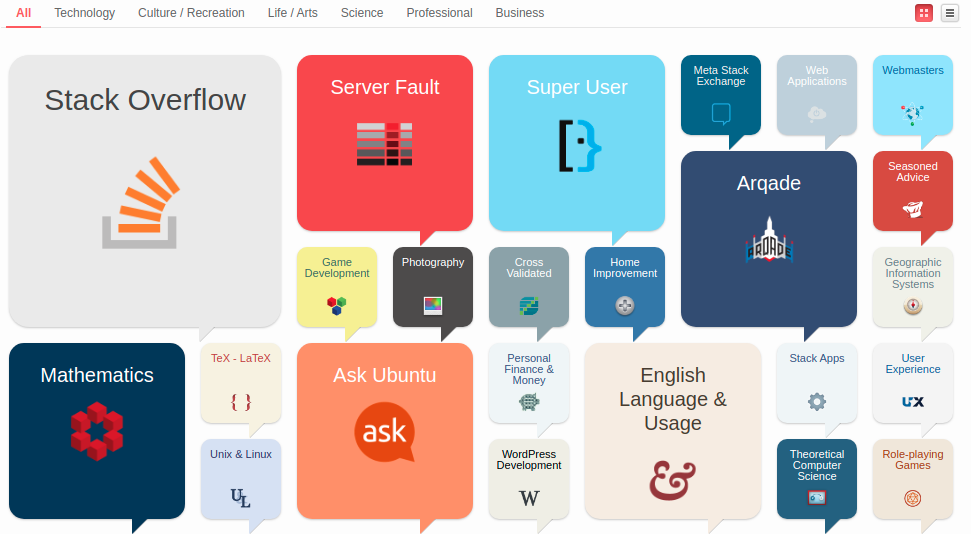

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable. More details are available on this [tour](https://stackexchange.com/tour)

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

- [Data Science](https://datascience.stackexchange.com/)
- [Cross Validated](https://stats.stackexchange.com/) — a statistics site
- [Artificial Intelligence](https://ai.stackexchange.com/)
- [Mathematics](https://math.stackexchange.com/)
- [Stack Overflow](https://stackoverflow.com/)

And if we want to include Data Engineering, we can also consider:

- [Database Administrators](https://dba.stackexchange.com/);
- [Unix & Linux](https://unix.stackexchange.com/);
- [Software Engineering](https://softwareengineering.stackexchange.com/);

At the time of writing, in terms of users Data Science Stack Exchange (DSSE) is among top 40 sites with 85K users, however, in terms of unanswered questions it is among bottom 7 with 64% unanswered questions. Further statistics are available [here](https://stackexchange.com/sites?view=list#questionsperday). This makes it quite attractive for exploring data science content.

### Data Science Stack Exchange (DSSE)

The site is organized into following sections:

- [Home](https://datascience.stackexchange.com/): Displays the `top questions` and contains a side bar menu with links to other sections of the site.

- [Questions]: Features all questions which can be filtered by `No answers` and `No accepted answers`. Currently, approximately 25,000 questions are featured of which over 15,000 are unanswered or with no accepted answer (63%).  

- [Tags](https://datascience.stackexchange.com/tags) are key words which organize questions as topics and facilitate search.

- [Users](https://datascience.stackexchange.com/users) features the data on users. Users with highest `reputation` are featured before the others. Users can be searched and filtered by `user name`, `reputation`, `New user` etc.

- [Unanswered](https://datascience.stackexchange.com/unanswered) features unanswered questions which can be filtered by votes, tags and newest.  

The footer menu has links to [Tour](https://datascience.stackexchange.com/tour) and [Help](https://datascience.stackexchange.com/help) sections along with links to other Stack Exchange sites and features. 

**Questions and Answers** 

Data Science Stack Exchange(DSSE) is a question and answer site for Data science professionals, Machine Learning specialists, and those interested in learning more about the field.The method of asking questions, getting answers, and getting promoted to higher levels is given [here](https://datascience.stackexchange.com/tour):

- The site is all about getting answers. It's not a discussion forum. There's no chit-chat.
- Good answers are voted up and rise to the top. The best answers show up first so that they are always easy to find.
- The person who asked can mark one answer as "accepted". Accepting doesn't mean it's the best answer, it just means that it worked for the person who asked.
- Focus on questions about an actual problem you have faced. Include details about what you have tried and exactly what you are trying to do.
- Avoid questions that are primarily opinion-based, or that are likely to generate discussion rather than answers. Questions that need improvement may be closed until someone fixes them.
- All questions are tagged with their subject areas. Each can have up to 5 tags. We can click any tag to see a list of questions with that tag, or go to the tag list to browse for topics 0f interest.
- User reputation score goes up when others vote up on their questions, answers and edits.
- User Privileges are granted based on reputation score. 

### Getting Data

Stack Exchange sites have a number of convenient ways of getting data:

- **Scraping** : We can scrape a page for relevant information.

In this case, we will be retrieving tags on the first page of the [tags link](https://datascience.stackexchange.com/tags)

In [1]:
import requests
# request data from "https://datascience.stackexchange.com/tags"
response = requests.get("https://datascience.stackexchange.com/tags")

content = response.content


from bs4 import BeautifulSoup

# Initialize the parser, and pass in the content we grabbed earlier.

parser = BeautifulSoup(content, 'html.parser')

tag = parser.select(".post-tag")

tags_scraping = []

for i in range(0,36):
    tag_text = tag[i].text
    tags_scraping.append(tag_text)
print(tags_scraping)

['machine-learning', 'python', 'neural-network', 'deep-learning', 'classification', 'keras', 'scikit-learn', 'tensorflow', 'nlp', 'r', 'time-series', 'dataset', 'regression', 'data-mining', 'clustering', 'cnn', 'predictive-modeling', 'pandas', 'lstm', 'statistics', 'feature-selection', 'data', 'random-forest', 'image-classification', 'decision-trees', 'linear-regression', 'text-mining', 'data-cleaning', 'visualization', 'reinforcement-learning', 'rnn', 'xgboost', 'logistic-regression', 'convnet', 'bigdata', 'svm']


**API**

Obviously, scraping is a tedious process and getting even the names of tags will involve a lot of coding.

Next, we can try the [Stack Exchange API](https://api.stackexchange.com/)

First, we register the app for access token
- App: Py Lesson
- Get client_id = 18238
- redirect_uri = `https://stackoverflow.com/oauth/login_success`


In [2]:
# access token requested
import requests
import requests.auth

response = requests.post("https://stackoverflow.com/oauth/dialog?client_id=18238&redirect_uri=https://stackoverflow.com/oauth/login_success")

print(response.status_code)


200


In [3]:
# access_token is only required for increased quota, write and access to private info
## Following access token is now expired

headers = {'access_token': '6QkGLWxpVNzS6XWzfOFXGw))', 'key': 'LCyb3nlOflFZqImiVbfZog((' }

response = requests.get("https://api.stackexchange.com/2.2/tags?page=1&pagesize=36&order=desc&sort=popular&site=datascience", headers=headers)
tags = response.json()


In [4]:
# Parse the json for extracting names of tags on page-1
import pandas as pd

tags_list = tags['items']

tags_df = pd.DataFrame(tags_list)

tags_api = tags_df["name"]
print(tags_api)


0           machine-learning
1                     python
2             neural-network
3              deep-learning
4             classification
5                      keras
6               scikit-learn
7                 tensorflow
8                        nlp
9                          r
10               time-series
11                   dataset
12                regression
13               data-mining
14                clustering
15                       cnn
16       predictive-modeling
17                    pandas
18                      lstm
19                statistics
20         feature-selection
21                      data
22             random-forest
23      image-classification
24            decision-trees
25         linear-regression
26               text-mining
27             data-cleaning
28             visualization
29    reinforcement-learning
30                       rnn
31                   xgboost
32       logistic-regression
33                   convnet
34            

In [5]:
# Check whether tag list obtained from scraping and from api are equal
tags_api = list(tags_df["name"])

equal = tags_api==tags_scraping
print(equal) # Are equal

True


**Stack Exchange Data Explorer [(SEDE)](https://data.stackexchange.com/help)**

SEDE is an open source tool for running arbitrary queries against public data from the Stack Exchange network. Features include collaborative query editing for all graduated and public beta Stack Exchange sites.

The data is updated early every Sunday morning around 3:00 UTC.

Apart from web-scraping and use of API, SEDE provides access to the database and entertains T-SQL queries.

[Following query](https://data.stackexchange.com/datascience/query/1259433/schema) run at SEDE gives the same results as obtained from web-scraping and API.

```
SELECT TOP 36 
            TagName, COUNT 
  FROM Tags 
ORDER BY COUNT DESC;

```
The query results can be downloaded as a csv file, and a permalink can also be created to the query (as done above). We will now compare results from the query with those of web_scraping and API.

In [6]:
import pandas as pd
query = pd.read_csv("top_36_tags.csv")
tags_query = query["TagName"]
tags_query = list(tags_query)
print(tags_query)

['machine-learning', 'python', 'neural-network', 'deep-learning', 'classification', 'keras', 'scikit-learn', 'tensorflow', 'nlp', 'r', 'time-series', 'dataset', 'regression', 'data-mining', 'clustering', 'cnn', 'predictive-modeling', 'pandas', 'lstm', 'statistics', 'feature-selection', 'data', 'random-forest', 'image-classification', 'decision-trees', 'linear-regression', 'text-mining', 'data-cleaning', 'visualization', 'reinforcement-learning', 'rnn', 'xgboost', 'logistic-regression', 'convnet', 'bigdata', 'svm']


In [7]:
# Check whether these results are same as those obtained from web-scraping and API

equal = tags_api==tags_scraping==tags_query

print(equal) # All results are equal

True


In [8]:
# Determine top ten popular topics from tags
top_ten = query[:10]
print(top_ten)

            TagName  COUNT
0  machine-learning   7879
1            python   4612
2    neural-network   3304
3     deep-learning   3214
4    classification   2182
5             keras   2058
6      scikit-learn   1542
7        tensorflow   1475
8               nlp   1393
9                 r   1224


### Getting Posts Data from SEDE

Above, we can see that maximum questions are contained in about top 10 or so tags. Same content (top 36 tags) is displayed on the [tags home page](https://datascience.stackexchange.com/tags)
Now we will focus on the `Posts` table in the database `SEDE` to create a database for a year (2019) and carry out a more granular analysis.  

We will run a query against the SEDE DSSE database that extracts the following columns for all the questions in 2019:
`Id`: An identification number for the post.
`PostTypeId`: An identification number for the type of post.
`CreationDate`: The date and time of creation of the post.
`Score`: The post's score.
`ViewCount`: How many times the post was viewed.
`Tags`: What tags were used.
`AnswerCount`: How many answers the question got (only applicable to question posts).
`FavoriteCount`: How many times the question was favored (only applicable to question posts).

**Using the API in Tandem**

We will use the API in tandem with query in order to compare some of our results.

In [9]:
# Find total number of questions in 2019 using API

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100&fromdate=1546300800&todate=1577750400&order=desc&sort=creation&site=stackoverflow&filter=!5-dmZUPsa(aVhP2rEGYktwXr6kydXo7VO6LStu", headers=headers)
questions_api = response.json()


questions_list = questions_api['items']
questions_100 = pd.DataFrame(questions_list) 
print(questions_100.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tags            100 non-null    object
 1   view_count      100 non-null    int64 
 2   favorite_count  100 non-null    int64 
 3   answer_count    100 non-null    int64 
 4   score           100 non-null    int64 
 5   creation_date   100 non-null    int64 
 6   question_id     100 non-null    int64 
 7   title           100 non-null    object
dtypes: int64(6), object(2)
memory usage: 6.4+ KB
None


# Find total number of questions from query

We can see from above that the api is limited to returning 100 results per page and getting all the data would need running a loop several times consuming computational resources. We will, therefore, get the complete data from the database running [following query](https://data.stackexchange.com/datascience/query/1259625/questions-in-2019)

```
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
 ```
 Note that of the various post types **Post TypeID** for "questions" is **1**.
 
 We download the results as `2019_questions.csv` from SEDE.

In [10]:
# Convert the results into dataframe

questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"]) 

print(questions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7948 non-null   int64         
 1   CreationDate   7948 non-null   datetime64[ns]
 2   Score          7948 non-null   int64         
 3   ViewCount      7948 non-null   int64         
 4   Tags           7948 non-null   object        
 5   AnswerCount    7948 non-null   int64         
 6   FavoriteCount  1517 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 434.8+ KB
None


### Data Cleaning

We want to eventually focus on the `tags` column as well as other popularity, so we will carry out following data-cleaning steps:
- Fill missing values in `FavoriteCount` with `0` as the missing values indicate that the question was not voted upon. 
- Convert `FavoriteCount` into `int`
- Convert `Tags` string into a more readable format

In [11]:
# Fill in missing values for the "FavoriteCount" column

questions.fillna(0, inplace=True)  
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

print(questions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7948 non-null   int64         
 1   CreationDate   7948 non-null   datetime64[ns]
 2   Score          7948 non-null   int64         
 3   ViewCount      7948 non-null   int64         
 4   Tags           7948 non-null   object        
 5   AnswerCount    7948 non-null   int64         
 6   FavoriteCount  7948 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 403.7+ KB
None


In [12]:
# Convert format of tags string

print(questions["Tags"].sample(5))

3619        <nlp><sentiment-analysis><lda><dirichlet>
7072                         <bigdata><apache-hadoop>
1404                         <time-series><lstm><rnn>
5266    <machine-learning><regression><loss-function>
2591               <nlp><convnet><sentiment-analysis>
Name: Tags, dtype: object


In [13]:
questions["Tags"] = questions["Tags"].str.replace('^<|>$','').str.split('><')
print(questions["Tags"].sample(5))

2543                                     [classification]
4507    [machine-learning, neural-network, deep-learni...
1499                       [tensorflow, training, epochs]
6268    [classification, random-forest, recommender-sy...
2260                                            [twitter]
Name: Tags, dtype: object


### Most Used and Most Viewed Tags
We will focus on `Tags` to determine:

- Count how many times each tag was used.
- Count how many times each tag was viewed.
- Create visualizations for the top tags of each of the above results.

In [14]:
print(questions.sample(5))

         Id        CreationDate  Score  ViewCount  \
3378  52974 2019-05-31 12:48:16      0         54   
454   55764 2019-07-16 10:17:46      0         17   
1727  61024 2019-09-30 04:00:46      2        102   
3412  62103 2019-10-22 23:52:38      5        117   
867   51348 2019-05-03 22:42:39      5       2701   

                                                   Tags  AnswerCount  \
3378                                           [python]            1   
454             [regression, optimization, programming]            0   
1727   [deep-learning, nlp, loss-function, transformer]            1   
3412                                              [pca]            1   
867   [machine-learning, python, dataset, data-clean...            1   

      FavoriteCount  
3378              0  
454               0  
1727              1  
3412              1  
867               3  


In [15]:
tag_no = {}
for tags in questions["Tags"]:
    for tag in tags:
        if tag not in tag_no:
            tag_no[tag] = 1
        else:
            tag_no[tag] += 1

In [16]:
tag_no = pd.DataFrame.from_dict(data=tag_no, orient="index")
tag_no.rename(columns={0: "No"}, inplace=True)
most_used=tag_no.sort_values(by='No', ascending=False, axis=0).head(20)

most_used

,No
machine-learning,2443
python,1652
deep-learning,1082
neural-network,960
keras,841
classification,629
tensorflow,515
scikit-learn,491
nlp,450
cnn,439


### Using SEDE Query

We can use the [SEDE Query](https://data.stackexchange.com/datascience/query/1259649/questions-in-2019) to obtain the same results as above.

```
SELECT TagName, COUNT(TagName)
  FROM Posts AS p 
                INNER JOIN PostTags AS pt ON pt.PostId=p.id
                INNER JOIN Tags AS t ON t.id=pt.TagId
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019
 GROUP BY TagName
 ORDER BY COUNT(TagName) DESC;
 
 ```

In [17]:
tags_2019 = pd.read_csv("tags_2019.csv") 
tags_2019.rename(columns={"Unnamed: 1": "No"}, inplace=True)
print(tags_2019.tail(20))

                      TagName  No
483               unseen-data   1
484          state-of-the-art   1
485            functional-api   1
486                       sap   1
487                categories   1
488               text-filter   1
489                   history   1
490                       hog   1
491               open-source   1
492               bayes-error   1
493                       esl   1
494                    galago   1
495       3d-object-detection   1
496               frequentist   1
497             noisification   1
498                     anova   1
499  data-indexing-techniques   1
500                     rdkit   1
501         least-squares-svm   1
502                  manifold   1


In [18]:
# Results obtained from query and dataset are equal
equal = list(most_used["No"]) == list(tags_2019["No"].head(20))
print(equal)

True


In [19]:
# Determining Viewcounts for Tags in 2019

view_no = {}
for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag not in view_no:
            view_no[tag] = row['ViewCount']
        else:
            view_no[tag] += row['ViewCount']

In [20]:
view_no = pd.DataFrame.from_dict(data=view_no, orient="index")
view_no.rename(columns={0: "No"}, inplace=True)
most_viewed=view_no.sort_values(by='No', ascending=False, axis=0).head(20) 

most_viewed

,No
python,1196833
machine-learning,773935
keras,544628
pandas,527831
deep-learning,453475
neural-network,380012
scikit-learn,280534
tensorflow,257580
classification,209486
dataframe,203979


### Using SEDE Query

We can use the [SEDE Query](https://data.stackexchange.com/datascience/query/1259696/viewcount-for-tags-created-in-2019-and-active-in-2019) to obtain the same results as above.

```
SELECT TagName, SUM(ViewCount)
  FROM Posts AS p 
                INNER JOIN PostTags AS pt ON pt.PostId=p.id
                INNER JOIN Tags AS t ON t.id=pt.TagId
                WHERE (PostTypeId = 1 AND YEAR(CreationDate) = 2019)
 GROUP BY TagName
 ORDER BY 2 DESC;
 
 ```

In [21]:
views_2019 = pd.read_csv("views_2019.csv") 
views_2019.rename(columns={"Unnamed: 1": "No"}, inplace=True)
print(views_2019.head(20))

             TagName       No
0             python  1196833
1   machine-learning   773935
2              keras   544628
3             pandas   527831
4      deep-learning   453475
5     neural-network   380012
6       scikit-learn   280534
7         tensorflow   257580
8     classification   209486
9          dataframe   203979
10               nlp   152420
11               cnn   151930
12              lstm   143433
13       time-series   130870
14             numpy   116095
15        regression    94623
16               csv    88767
17           pytorch    88365
18           dataset    83026
19           seaborn    74060


In [22]:
# Results obtained from query and dataset are equal
equal = list(most_viewed["No"]) == list(views_2019["No"].head(20))
print(equal)

True


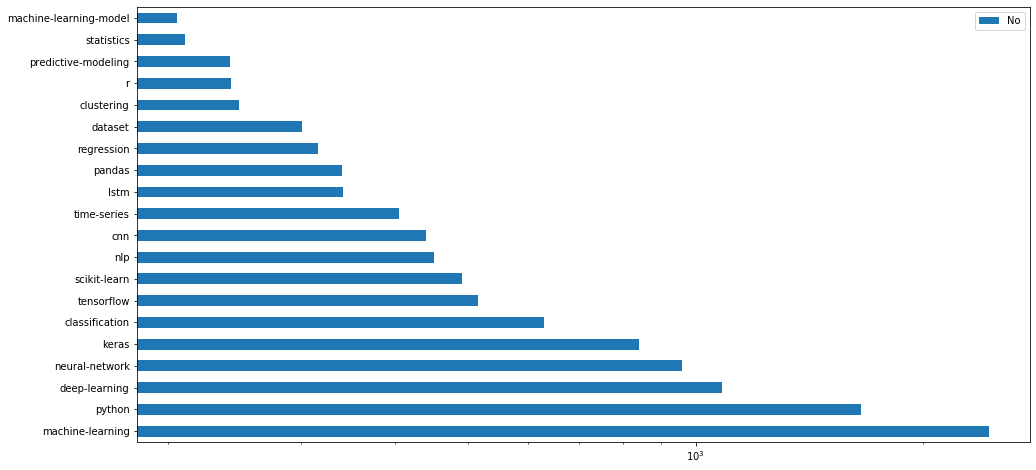

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
most_used.plot(kind="barh", figsize=(16,8),logx=True) #log scaling on x axis due to very large numbers

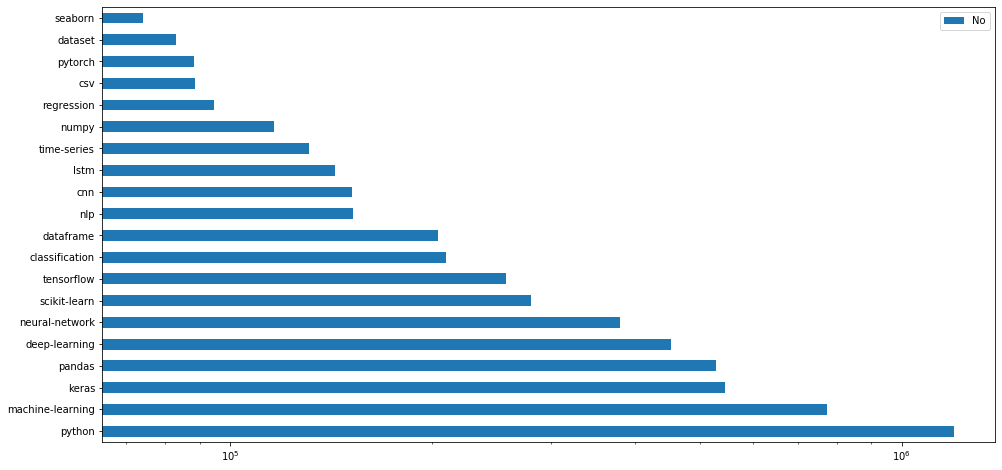

In [24]:
most_viewed.plot(kind="barh", figsize=(16,8),logx=True)#log scaling on x axis due to very large numbers

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B806E48>],
      dtype=object)

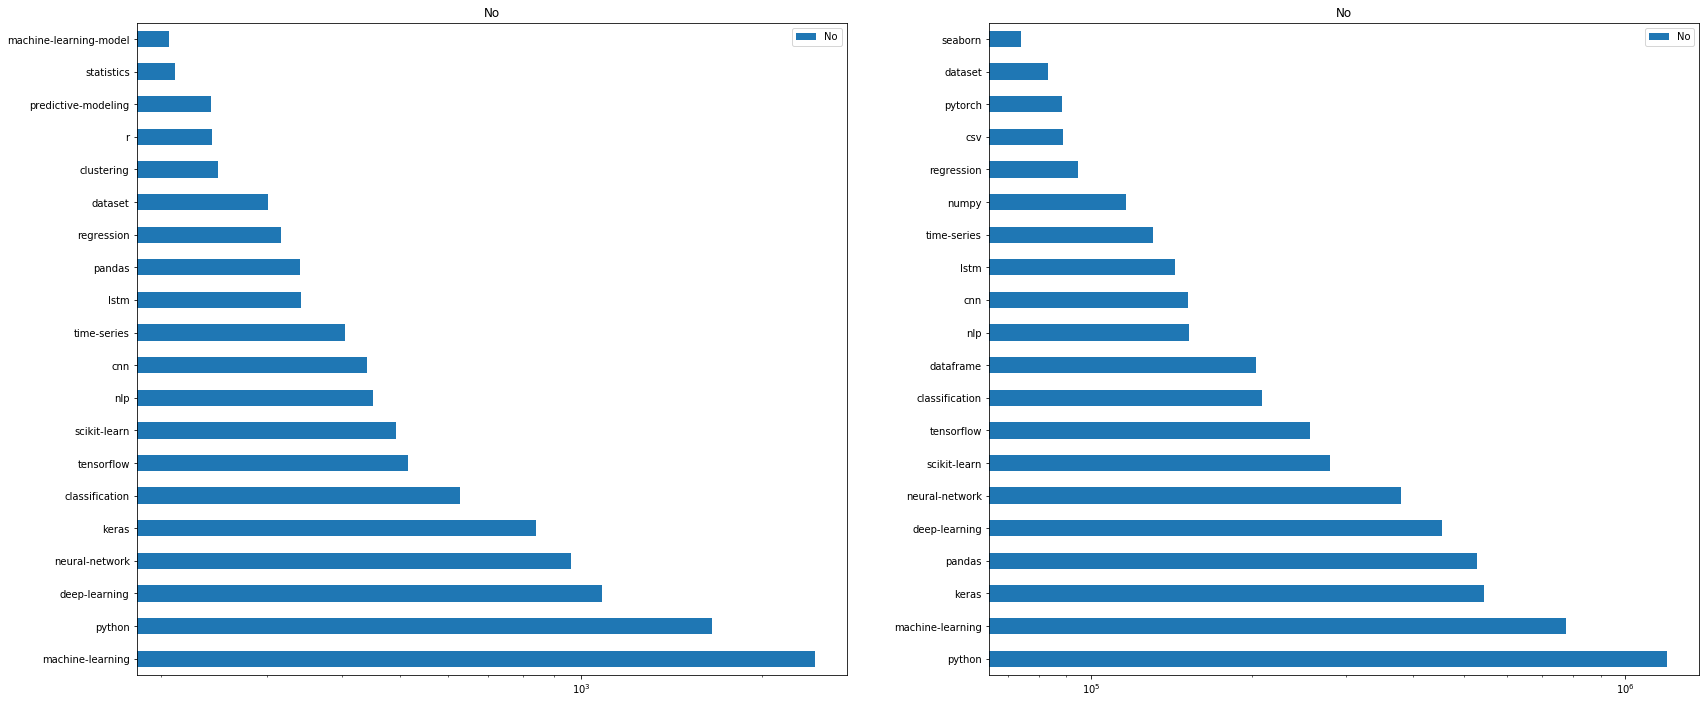

In [25]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((28, 12))
#log scaling on x axis due to very large numbers
most_used.plot(kind="barh", ax=axes[0], subplots=True, logx=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True, logx=True) 

### Relations Between Tags

If we want to see what tags are in `most_used`, but not in `most_viewed`, We can identify them by the missing values in ViewCount. 

Similarly if we want to know which tags are  in the latter, but not the former we can use a similar approach.

In [26]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
print(in_used)

                        No_x       No_y
machine-learning        2443   773935.0
python                  1652  1196833.0
deep-learning           1082   453475.0
neural-network           960   380012.0
keras                    841   544628.0
classification           629   209486.0
tensorflow               515   257580.0
scikit-learn             491   280534.0
nlp                      450   152420.0
cnn                      439   151930.0
time-series              405   130870.0
lstm                     341   143433.0
pandas                   340   527831.0
regression               316    94623.0
dataset                  301    83026.0
clustering               249        NaN
r                        243        NaN
predictive-modeling      242        NaN
statistics               211        NaN
machine-learning-model   206        NaN


In [27]:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

,No_x,No_y
python,1652.0,1196833
machine-learning,2443.0,773935
keras,841.0,544628
pandas,340.0,527831
deep-learning,1082.0,453475
neural-network,960.0,380012
scikit-learn,491.0,280534
tensorflow,515.0,257580
classification,629.0,209486
dataframe,NaN,203979


- `clustering`, `r`, `predictive-modeling`, `statistics` and `machine-learning-model` are in `most_used` but not in `most_viewed`.      

- `dataframe`, `numpy`, `csv`, `pytorch` and `seaborn` are in `most_viewed` but not in `most-used`. 	

** Simpler Approach using Sets**

A far simpler appraoch is to use set methods `intersection` and `difference`

- As is obvious below, it gives the same results as above. 

In [28]:
set(most_used.index).intersection(set(most_viewed.index)) 

{'classification',
 'cnn',
 'dataset',
 'deep-learning',
 'keras',
 'lstm',
 'machine-learning',
 'neural-network',
 'nlp',
 'pandas',
 'python',
 'regression',
 'scikit-learn',
 'tensorflow',
 'time-series'}

In [29]:
set(most_used.index).difference(set(most_viewed.index)) 

{'clustering',
 'machine-learning-model',
 'predictive-modeling',
 'r',
 'statistics'}

In [30]:
set(most_viewed.index).difference(set(most_used.index)) 

{'csv', 'dataframe', 'numpy', 'pytorch', 'seaborn'}

### Identifying Potential Data Science Content using Domain Knowledge

As practitioners, we are aware that data science is a multi-disciplinary field with broad interlinked disciplines as under:

- Computer programming 
- Data management
- Calculus, Maths and Algebra
- Statistics and Probability
- Artificial Intelligence

Our strategy will be:
- Identify most popular (most_used) tags associated with each dsicipline using domain knowledge.
- Run queries in the DSDE database to get other tags most frequently used with most popular tags.
- Create a superset of tags for each domain (discipline) and make them unique through set operations
- classify `tags` column in `all_questions` dataframe against each superset for classification as a subset.

Since general coding questions are dealt with at [stack overflow](https://stackoverflow.com/), we will leave this part out. 
- From Data management, we will focus on the tag `dataset` and create superset `ss_data`
- From the mathematical domains, we will focus on the tag `statistics` and create superset`ss_stat`
- From AI domains, we will focus on tags `machine-learning` and `deep-learning` and create superset `ss_ai`

### Superset Data

Run following query at SEDE
```
SELECT Tags, TagName
  FROM Posts AS p 
                INNER JOIN PostTags AS pt ON pt.PostId=p.id
                INNER JOIN Tags AS t ON t.id=pt.TagId
 WHERE TagName = 'dataset';
 ```

In [31]:
# Create a set 'ss_data'
ss_data_df = pd.read_csv("ss_data.csv")

ss_data_df["Tags"] = ss_data_df["Tags"].str.replace('^<|>$','').str.split('><') # clean dataframe

print(ss_data_df.head(5),'\n')



ss_data_list = []
for index, row in ss_data_df.iterrows():
    for tag in row['Tags']:
        ss_data_list.append(tag)
print(ss_data_list[:10], '\n')  

print(len(ss_data_list),'\n')

ss_data = set(ss_data_list)

print(len(ss_data))



                                                Tags  TagName
0                             [open-source, dataset]  dataset
1                   [open-source, dataset, crawling]  dataset
2  [machine-learning, classification, dataset, cl...  dataset
3                   [visualization, dataset, graphs]  dataset
4                          [knowledge-base, dataset]  dataset 

['open-source', 'dataset', 'open-source', 'dataset', 'crawling', 'machine-learning', 'classification', 'dataset', 'clustering', 'text-mining'] 

3491 

271


### Superset Statistics

Run following query at SEDE

```
SELECT Tags, TagName
  FROM Posts AS p 
                INNER JOIN PostTags AS pt ON pt.PostId=p.id
                INNER JOIN Tags AS t ON t.id=pt.TagId
 WHERE TagName = 'statistics';

In [32]:
# Create a set 'ss_stat'
ss_stat_df = pd.read_csv("ss_stats.csv")

ss_stat_df["Tags"] = ss_stat_df["Tags"].str.replace('^<|>$','').str.split('><') # clean dataframe

print(ss_stat_df.head(5),'\n')



ss_stat_list = []
for index, row in ss_stat_df.iterrows():
    for tag in row['Tags']:
        ss_stat_list.append(tag)
print(ss_stat_list[:10], '\n')  

print(len(ss_stat_list),'\n')

ss_stat = set(ss_stat_list)

print(len(ss_stat))


                                                Tags     TagName
0                              [bigdata, statistics]  statistics
1                              [statistics, bigdata]  statistics
2  [bigdata, machine-learning, databases, statist...  statistics
3  [machine-learning, statistics, feature-selection]  statistics
4                    [statistics, reference-request]  statistics 

['bigdata', 'statistics', 'statistics', 'bigdata', 'bigdata', 'machine-learning', 'databases', 'statistics', 'education', 'machine-learning'] 

2535 

220


### Superset machine-learning

Run following query at SEDE
```
SELECT Tags, TagName
  FROM Posts AS p 
                INNER JOIN PostTags AS pt ON pt.PostId=p.id
                INNER JOIN Tags AS t ON t.id=pt.TagId
 WHERE TagName = 'machine-learning';

In [33]:
# Create a set 'ss_ml'
ss_ml_df = pd.read_csv("ss_ml.csv")

ss_ml_df["Tags"] = ss_ml_df["Tags"].str.replace('^<|>$','').str.split('><') # clean dataframe

print(ss_ml_df.head(5),'\n')



ss_ml_list = []
for index, row in ss_ml_df.iterrows():
    for tag in row['Tags']:
        ss_ml_list.append(tag)
print(ss_ml_list[:10], '\n')  

print(len(ss_ml_list),'\n')

ss_ml = set(ss_ml_list)

print(len(ss_ml))


                                                Tags           TagName
0                                 [machine-learning]  machine-learning
1                [machine-learning, bigdata, libsvm]  machine-learning
2            [machine-learning, predictive-modeling]  machine-learning
3                    [data-mining, machine-learning]  machine-learning
4  [machine-learning, dimensionality-reduction, p...  machine-learning 

['machine-learning', 'machine-learning', 'bigdata', 'libsvm', 'machine-learning', 'predictive-modeling', 'data-mining', 'machine-learning', 'machine-learning', 'dimensionality-reduction'] 

27613 

476


In [34]:
# Create a set 'ss_dl'
ss_dl_df = pd.read_csv("ss_dl.csv")

ss_dl_df["Tags"] = ss_dl_df["Tags"].str.replace('^<|>$','').str.split('><') # clean dataframe

print(ss_dl_df.head(5),'\n')



ss_dl_list = []
for index, row in ss_dl_df.iterrows():
    for tag in row['Tags']:
        ss_dl_list.append(tag)
print(ss_dl_list[:10], '\n')  

print(len(ss_dl_list),'\n')

ss_dl = set(ss_dl_list)

print(len(ss_dl))


                                                Tags        TagName
0  [machine-learning, neural-network, deep-learni...  deep-learning
1                    [neural-network, deep-learning]  deep-learning
2  [machine-learning, data-mining, neural-network...  deep-learning
3  [machine-learning, classification, deep-learning]  deep-learning
4                  [machine-learning, deep-learning]  deep-learning 

['machine-learning', 'neural-network', 'deep-learning', 'optimization', 'hyperparameter', 'neural-network', 'deep-learning', 'machine-learning', 'data-mining', 'neural-network'] 

12249 

369


In [35]:
# We will join ss_ml and ss_dl to create one superset ss_ai
ss_ai = ss_ml.union(ss_dl)

print(len(ss_ai))

495


### Classification of Questions into Data Science Disciplines

- We have now created 3 supersets i.e. `ss_data`, `ss_stat`and `ss_ai`  containing unique values of tags related to three broad disciplines: "Data Management (dm)", "Statistics (stat)" and "Artificial Intelligence (ai)"  

- We will now see, how many questions ever asked on SEDE (Data Science) fall under these disciplines. 

- Run following query at SEDE to get all_questions:
```
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
 
 ```


In [36]:
# Create dataframe aq
aq = pd.read_csv("all_questions.csv")

aq["Tags"] = aq["Tags"].str.replace('^<|>$','').str.split('><') # clean dataframe



print(aq.head(10),'\n')

      Id         CreationDate  \
0  12954  2016-07-23 07:05:30   
1  12956  2016-07-23 09:46:42   
2  12958  2016-07-23 12:34:34   
3  12959  2016-07-23 21:02:17   
4  12960  2016-07-23 22:33:04   
5  12961  2016-07-24 08:33:43   
6  12964  2016-07-24 10:17:35   
7  12974  2016-07-25 04:31:08   
8  12978  2016-07-25 13:00:12   
9  12979  2016-07-25 14:22:25   

                                                Tags  
0        [python, clustering, unsupervised-learning]  
1  [deep-learning, rnn, normalization, batch-norm...  
2  [classification, clustering, statistics, missi...  
3  [machine-learning, markov-process, audio-recog...  
4            [text-mining, feature-extraction, text]  
5                      [classification, svm, graphs]  
6                  [neural-network, tensorflow, rnn]  
7                               [python, tensorflow]  
8                               [recommender-system]  
9  [python, feature-extraction, image-classificat...   



- We will create three additional columns in the aq dataframe `dm`, `stat`, `ai` and populate them with 0
- if the tags list is a subset of any of the supersets respective column will change to 1

In [37]:
zeros = []
for index, row in aq.iterrows():
    zeros.append(0)
aq["dm"] = zeros
aq["stat"] = zeros
aq["ai"] = zeros

print(aq.head(5),'\n')

      Id         CreationDate  \
0  12954  2016-07-23 07:05:30   
1  12956  2016-07-23 09:46:42   
2  12958  2016-07-23 12:34:34   
3  12959  2016-07-23 21:02:17   
4  12960  2016-07-23 22:33:04   

                                                Tags  dm  stat  ai  
0        [python, clustering, unsupervised-learning]   0     0   0  
1  [deep-learning, rnn, normalization, batch-norm...   0     0   0  
2  [classification, clustering, statistics, missi...   0     0   0  
3  [machine-learning, markov-process, audio-recog...   0     0   0  
4            [text-mining, feature-extraction, text]   0     0   0   



In [38]:
print(ss_data)

{'ridge-regression', 'r', 'etl', 'excel', 'natural-language-process', 'tools', 'evaluation', 'fastai', 'gridsearchcv', 'svm', 'definitions', 'hyperparameter-tuning', 'forecasting', 'non-parametric', 'scipy', 'kaggle', 'nlp', 'regression', 'data-augmentation', 'text-mining', 'categorical-data', 'imbalanced-learn', 'ensemble-learning', 'learning', 'autoencoder', 'data-analysis', 'processing', 'activity-recognition', 'neural', 'ml', 'dummy-variables', 'smote', 'graphical-model', 'project-planning', 'beginner', 'pandas', 'bert', 'finance', 'matlab', 'feature-engineering', 'metric', 'data-mining', 'multilabel-classification', 'tableau', 'binary', 'accuracy', 'methods', 'linear-regression', 'plotting', 'keras', 'tensorflow', 'machine-learning-model', 'twitter', 'boosting', 'mlp', 'bioinformatics', 'encoding', 'multi-instance-learning', 'one-hot-encoding', 'interpolation', 'math', 'pyspark', 'naive-bayes-classifier', 'recommender-system', 'convolution', 'crawling', 'sql', 'rnn', 'generalizati

In [39]:
# Convert "Tags" column to set using apply method
aq["Tags"] = aq["Tags"].apply(set)

print(aq.head(5),'\n')  
    

      Id         CreationDate  \
0  12954  2016-07-23 07:05:30   
1  12956  2016-07-23 09:46:42   
2  12958  2016-07-23 12:34:34   
3  12959  2016-07-23 21:02:17   
4  12960  2016-07-23 22:33:04   

                                                Tags  dm  stat  ai  
0        {unsupervised-learning, clustering, python}   0     0   0  
1  {rnn, batch-normalization, normalization, deep...   0     0   0  
2  {missing-data, clustering, classification, sta...   0     0   0  
3  {machine-learning, audio-recognition, markov-p...   0     0   0  
4            {feature-extraction, text, text-mining}   0     0   0   



In [40]:
aq["Tags"].iloc[0].issubset(ss_ai)

True

In [41]:
""" Identifies whether a set is a subset of a superset""" 
def inset(x, ss):
    if x.issubset(ss):
        return 1
    else:
        return 0
         
aq["dm"] = aq["Tags"].apply(inset, ss=ss_data)
aq["stat"] = aq["Tags"].apply(inset, ss=ss_stat)        
aq["ai"] = aq["Tags"].apply(inset, ss=ss_ai)    

print(aq.head(20))    

       Id         CreationDate  \
0   12954  2016-07-23 07:05:30   
1   12956  2016-07-23 09:46:42   
2   12958  2016-07-23 12:34:34   
3   12959  2016-07-23 21:02:17   
4   12960  2016-07-23 22:33:04   
5   12961  2016-07-24 08:33:43   
6   12964  2016-07-24 10:17:35   
7   12974  2016-07-25 04:31:08   
8   12978  2016-07-25 13:00:12   
9   12979  2016-07-25 14:22:25   
10  60250  2019-09-16 01:20:59   
11  60251  2019-09-16 01:42:20   
12  60256  2019-09-16 05:42:00   
13  60257  2019-09-16 06:06:11   
14  60258  2019-09-16 06:52:32   
15  60260  2019-09-16 08:43:53   
16  60261  2019-09-16 08:50:27   
17  60262  2019-09-16 08:56:51   
18  60264  2019-09-16 09:03:19   
19  60266  2019-09-16 09:28:08   

                                                 Tags  dm  stat  ai  
0         {unsupervised-learning, clustering, python}   1     1   1  
1   {rnn, batch-normalization, normalization, deep...   1     0   1  
2   {missing-data, clustering, classification, sta...   1     1   1  
3   {

In [42]:
print(aq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24891 entries, 0 to 24890
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24891 non-null  int64 
 1   CreationDate  24891 non-null  object
 2   Tags          24891 non-null  object
 3   dm            24891 non-null  int64 
 4   stat          24891 non-null  int64 
 5   ai            24891 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB
None


### Set membership
Let's recall that the supersets are collections of tags which have ever been used with a combination of marker tags `machine=learning`, `deep-learning`, `statistcs` and `datasets` of 3 main disciplines i.e. "AI", "Maths" and "Data Management" which we identified based on domain knowledge. The larger the superset the more likely it will be for any combination of tags or even a single tag to be identified as a subset of a particular superset. 

As seen below, at present the membership criteria is quite lax and is solely  contingent upon "size of the superset". 

In [43]:
# Finding the size of membership
print ('ai members:', '\n', sum(aq["ai"]))

print ('dm members:', '\n', sum(aq["dm"]))

print ('stat members:', '\n', sum(aq["stat"])) 

ai members: 
 24420
dm members: 
 19895
stat members: 
 17729


### Refining "Discipline" Membership Criteria
As seen above, out of approximately 25,000 questions, more than 24,000 are classified as belonging to AI disciplines such as `machine-learning` and `deep-learning`.
So, it should not be enough to be a member of a superset. 

Since, the supersets control which particular combination of `tags` are its members, we must impose additionsl conditions for membership.  

We will amend the function `inset` to `indiscip` to reflect following additional/ existing conditions:

- **Length** of the set of tags must be at least 2, as a serious questioner homes in on topic of relevance from broad categories to specific topic or vice-versa. It is not necessary that, he will use the key tags such as `machine-learning` or `dataset` or `statistics` as people with different knowledge and skills are likely to have different conceptions of what is a broad category.

- **Unique Membership** We cannot implemenr unique membership, as there are lot of interlinks and cross-overs. A subset can be identified as belonging to more than one discipline. This is presently `True`. But we need to place some constraints on membership based on 'tags-combination'. For this, we will impose following condition through `indiscp` function:
**Out of a given combination of 'tags' for a question which is a subset of a particular superset, at least one 'tag' out of the combination, should not be a member of one of the other two other supersets.**  

- **Size of Superset** If we run following query at SEDE, we get the total number of tags used on the site.
```
SELECT COUNT(TagName)
  FROM Tags
596
```
 In order to qualify as a discipline, the size of superset should be substantial enough. We fix it arbitrarily as **25%** (150) of unique tag names. 

In [44]:
"""Identifies whether a set of 'tags' is a subset of a data science discipline""" 
def indiscip(x, ss1, ss2, ss3):
    if (x.issubset(ss1) and len(x) >=2 and len(ss1) > 150) and (len(x.difference(ss2))>=1 or len(x.difference(ss3))>=1):
        return 1
    else:
        return 0
         
aq["dm"] = aq["Tags"].apply(indiscip, ss1=ss_data, ss2=ss_stat, ss3=ss_ai)
aq["stat"] = aq["Tags"].apply(indiscip, ss1=ss_stat, ss2=ss_data, ss3=ss_ai)        
aq["ai"] = aq["Tags"].apply(indiscip, ss1=ss_ai, ss2=ss_data, ss3=ss_stat)  


print ('ai questions:', '\n', sum(aq["ai"]))

print ('dm questions:', '\n', sum(aq["dm"]))

print ('stat questions:', '\n', sum(aq["stat"]))

ai questions: 
 7504
dm questions: 
 3134
stat questions: 
 1155


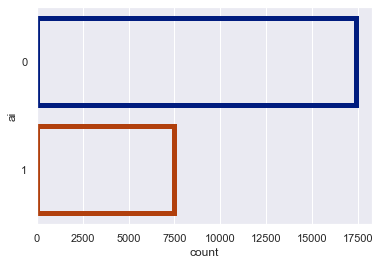

In [45]:
# Plot results for AI
import seaborn as sns
sns.set(style="darkgrid")

ax1= sns.countplot(y="ai", data=aq, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))



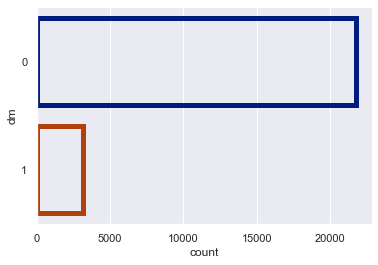

In [46]:
# Plot results for Data Management
ax= sns.countplot(y="dm", data=aq, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))


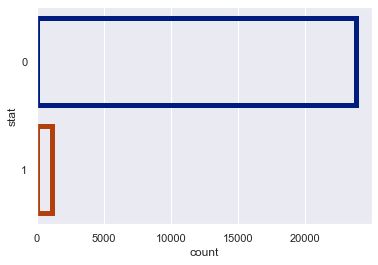

In [47]:
# Plot results from Statistics
ax=sns.countplot(y="stat", data=aq, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

### Exploring Time-Series for all Disciplines
From above it can be seen that **AI** and its components `machine-learning` and subfield `deep-learning` form the major thrust of questions at SEDS. However, other disciplines are not insignificant, and We will explore them further as a time series.

- We have already classified all `ai` questions as `deep-learning` questions. 
We will now use the dataframe `aq` to:

- Count how many questions per discipline including `deep-learning` are asked per time period.
- The total amount of questions per time period.
- How many `deep learning` and other disciplines' questions there are relative to the total amount of questions per time period.

### Analysis Strategy

- We will change `CreationDate` to string in `yymm` format
- Define a function `get_qtr` which uses string functions to extract quarters from string in format `yyQn`, where `n` is the quarter number 
- `apply` function `get_qtr` to `CreationDate` and convert it to `yyQn` format
- `groupby` `yyQn` and aggregate count for all disciplines `ai`, `dm` and `stat`
- Plot results

In [48]:
# change "CreationDate" to string
aq_ts = aq
aq_ts["qtr"] = aq_ts["CreationDate"].astype(str).str[2:7].str.replace('-','')
aq_ts.drop(labels="CreationDate", axis=1, inplace=True)


In [49]:
aq_ts=aq_ts.sort_values(by='qtr', ascending=True)
print(aq_ts.head())

       Id                                               Tags  dm  stat  ai  \
3464  184                                            {tools}   0     0   0   
1948   71                              {bigdata, statistics}   0     0   0   
3455  134  {apache-hadoop, mongodb, map-reduce, scalability}   0     0   1   
3456  138                 {performance, bigdata, efficiency}   0     1   1   
3457  143  {.net, efficiency, indexing, data-indexing-tec...   0     0   0   

       qtr  
3464  1405  
1948  1405  
3455  1405  
3456  1405  
3457  1405  


In [50]:
# Define function get_qtr
""" extracts quarters from yymm"""
def get_qtr(string):
    year = int(string[0:2])*100
    month = int(string)-year
    qtr = int(((month)-1)/3)+1
    return '{y}Q{q}'.format(y=string[0:2], q=qtr)

In [51]:
# apply 'get_qtr' to 'aq_ts["qtr"]'
aq_ts["qtr"] = aq_ts["qtr"].apply(get_qtr)


In [52]:
print(aq_ts.tail())

          Id                                               Tags  dm  stat  ai  \
23500  76923        {graphical-model, machine-learning, graphs}   0     0   0   
23499  76922        {time-series, visualization, data-analysis}   0     0   0   
23498  76921  {feature-engineering, ndcg, ranking, recommend...   0     0   0   
23557  76972              {training, machine-learning, xgboost}   0     0   0   
24025  77093  {vector-space-models, rnn, deep-learning, tran...   0     0   1   

        qtr  
23500  20Q3  
23499  20Q3  
23498  20Q3  
23557  20Q3  
24025  20Q3  


In [53]:
import numpy as np 
aq_ts_pt = aq_ts.pivot_table(values = ["ai","dm","stat"], index = "qtr", aggfunc=(np.sum))


In [54]:
print(aq_ts_pt)




        ai   dm  stat
qtr                  
14Q2    51   11    19
14Q3    34   11     9
14Q4    29    9     6
15Q1    26   16     6
15Q2    57   24    12
15Q3    48   17    16
15Q4    74   24    13
16Q1   120   42    21
16Q2   132   47    19
16Q3   126   42    32
16Q4   124   43    33
17Q1   168   86    33
17Q2   168   63    39
17Q3   171   79    28
17Q4   235   88    42
18Q1   335  166    44
18Q2   402  177    83
18Q3   412  178    61
18Q4   367  154    61
19Q1   534  231    85
19Q2   585  248    87
19Q3   735  310    99
19Q4   732  322    87
20Q1   793  319    86
20Q2  1005  410   130
20Q3    41   17     4


In [55]:
# We will drop 2020 Q3 as it has just started and data is incomplete
aq_ts_pt.drop(labels="20Q3", inplace=True)

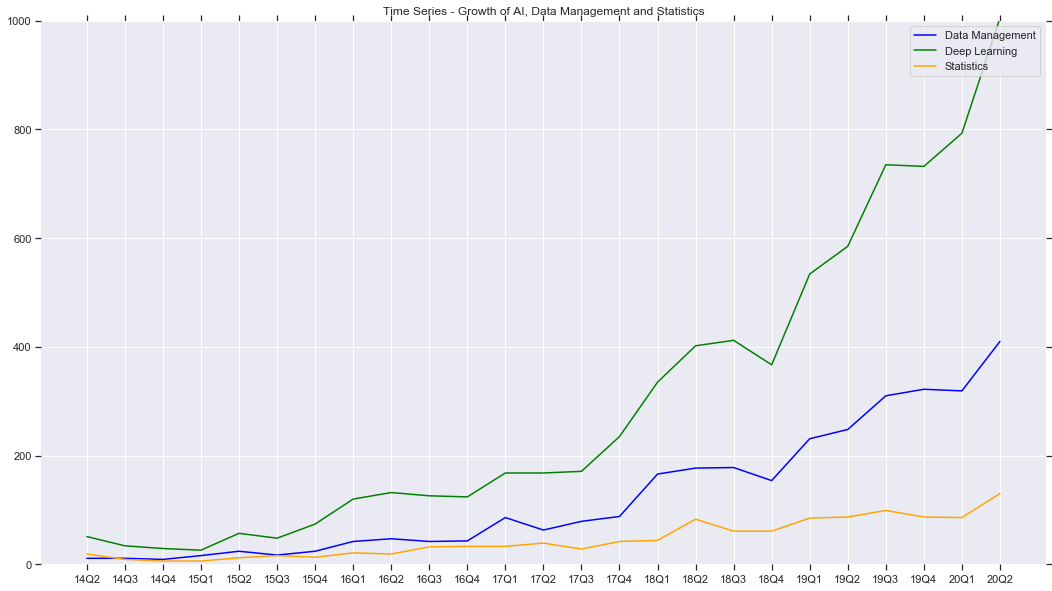

In [56]:
# Plotting Time Series

fig, ax = plt.subplots(figsize=(18,10))
ax.plot(aq_ts_pt.index, aq_ts_pt['dm'],c='blue',label='Data Management')
ax.plot(aq_ts_pt.index, aq_ts_pt['ai'],c='green',label='Deep Learning')
ax.plot(aq_ts_pt.index, aq_ts_pt['stat'],c='orange',label='Statistics')
ax.set_title('Time Series - Growth of AI, Data Management and Statistics')
ax.legend(loc="upper right")
plt.ylim(0, 1000)
ax.tick_params(bottom="off",top="off",right="off",left="off")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

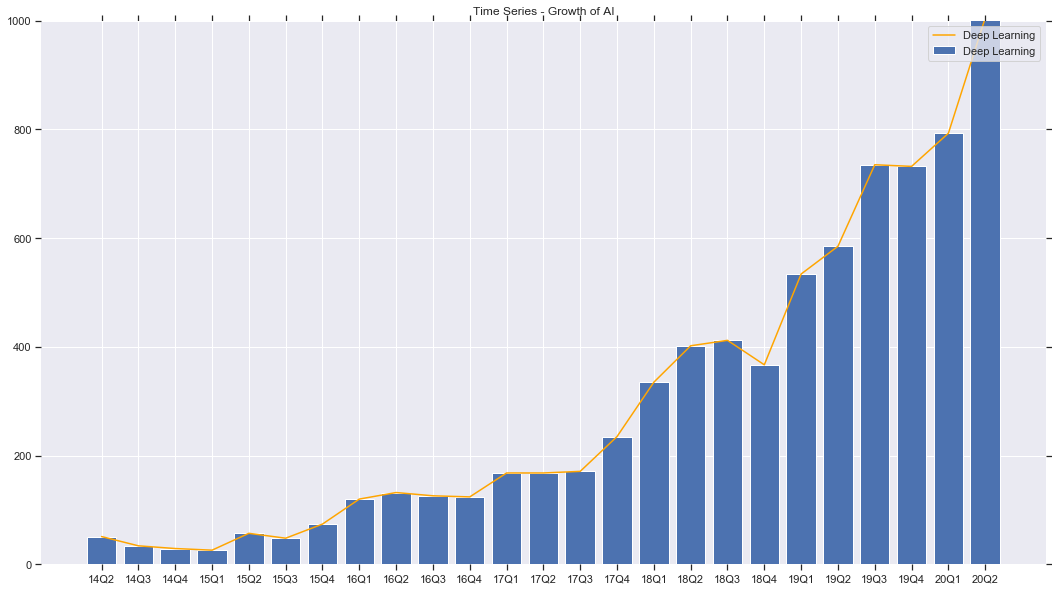

In [69]:
# Plotting Time Series

fig, ax = plt.subplots(figsize=(18,10))

ax.bar(aq_ts_pt.index, aq_ts_pt['ai'], label='Deep Learning')

ax.plot(aq_ts_pt.index, aq_ts_pt['ai'],c='orange',label='Deep Learning')

plt.ylim(0, 1000)
ax.set_title('Time Series - Growth of AI')
ax.legend(loc="upper right")

ax.tick_params(bottom="off",top="off",right="off",left="off")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000114EDDC8>],
      dtype=object)

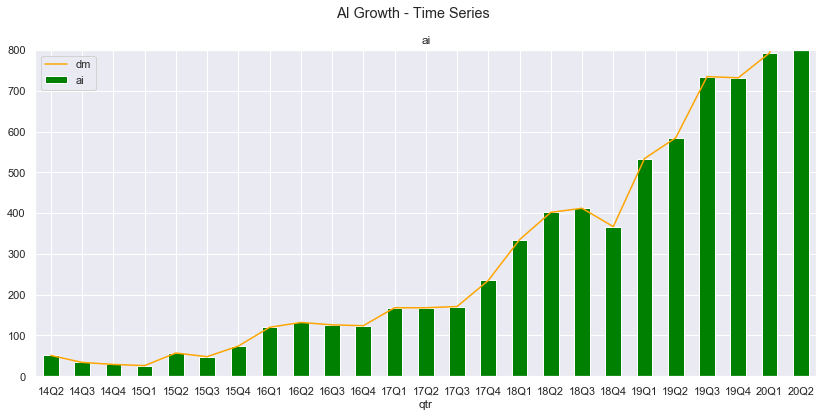

In [68]:
# Plotting Time Series: "AI Growth"

fig, axes = plt.subplots()
fig.set_size_inches((14, 6))
plt.ylim(0, 800)

aq_ts_pt["ai"].plot(kind="bar", color='green', subplots=True, label="ai", legend=True, title = "AI Growth - Time Series")
aq_ts_pt["ai"].plot(kind="line", color='orange', subplots=True, label="dm", legend=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010F26908>],
      dtype=object)

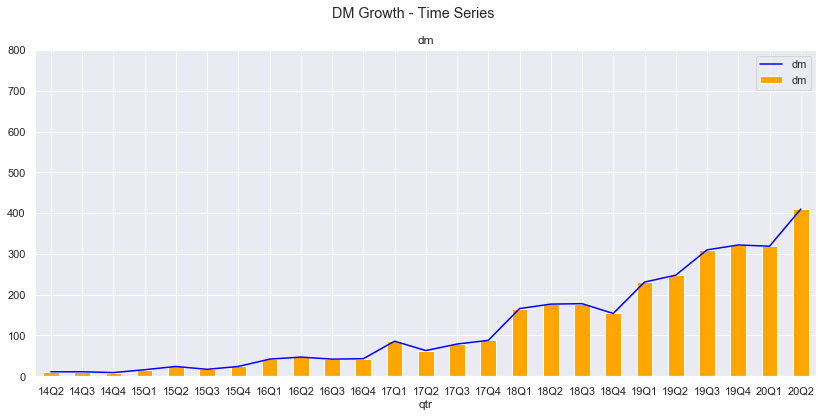

In [67]:
# Plotting Time Series: "DM Growth"

fig, axes = plt.subplots()
fig.set_size_inches((14, 6))
plt.ylim(0, 800)
aq_ts_pt["dm"].plot(kind="bar", color='orange', subplots=True, label="dm", legend=True, title = "DM Growth - Time Series")
aq_ts_pt["dm"].plot(kind="line", color='blue', subplots=True, label="dm", legend=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010E87CC8>],
      dtype=object)

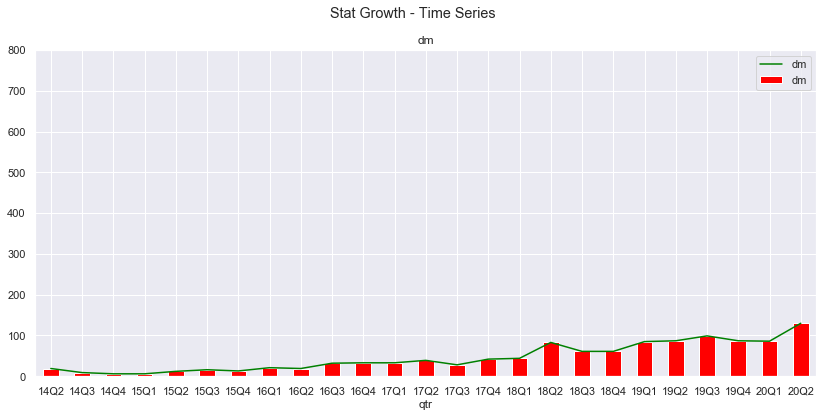

In [66]:
# Plotting Time Series: "Stat Growth"

fig, axes = plt.subplots()
fig.set_size_inches((14, 6))
plt.ylim(0, 800)
#log scaling on x axis due to very large numbers
aq_ts_pt["stat"].plot(kind="bar", color='red', subplots=True, label="stat", legend=True, title = "Stat Growth - Time Series")
aq_ts_pt["stat"].plot(kind="line", color='green', subplots=True, label="stat", legend=True)

### Recommendations

- It is clear from above that the AI subfields including `deep-learning` and to an extent `data-management` subfields have shown marked growth since 4th quarter of 2018. Perhaps, this is indicative of the interest in the field in general. A major AI discipline `maths-statistics` has not registered much interset despite being a major requirement for data analysis. Perhaps, it is due to requirement of STEM education in this field.   

- Our content, for present, should be focused on `deep-learning` and `data-management`. 